In [1]:
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import joblib


In [3]:
df = pandas.read_csv(r"C:\Users\ballc\OneDrive\Documents\Desktop\data analytics final\data.csv")

In [4]:
print(f"[!] Size of dataset before dropping duplicate/null values: {len(df.axes[0])}")
df = df.drop_duplicates()
print(f"[!] Size of dataset after dropping duplicate/null values: {len(df.axes[0])}")

print(df['SalePrice'].describe())

[!] Size of dataset before dropping duplicate/null values: 1460
[!] Size of dataset after dropping duplicate/null values: 1460
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [5]:
unwanted_features = ['Condition1', 'Condition2', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageYrBlt',
                        'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'GarageCars', 'MSZoning', 'OverallQual']

In [6]:
df = df.drop(columns = unwanted_features)

In [7]:
print(f"[!] Number of features left after dropping unwanted columns: {len(df.dtypes)}")

[!] Number of features left after dropping unwanted columns: 64


In [8]:
numeric_cols = ['GrLivArea', 'LotFrontage', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MasVnrArea', 'GarageArea', 'LotArea']

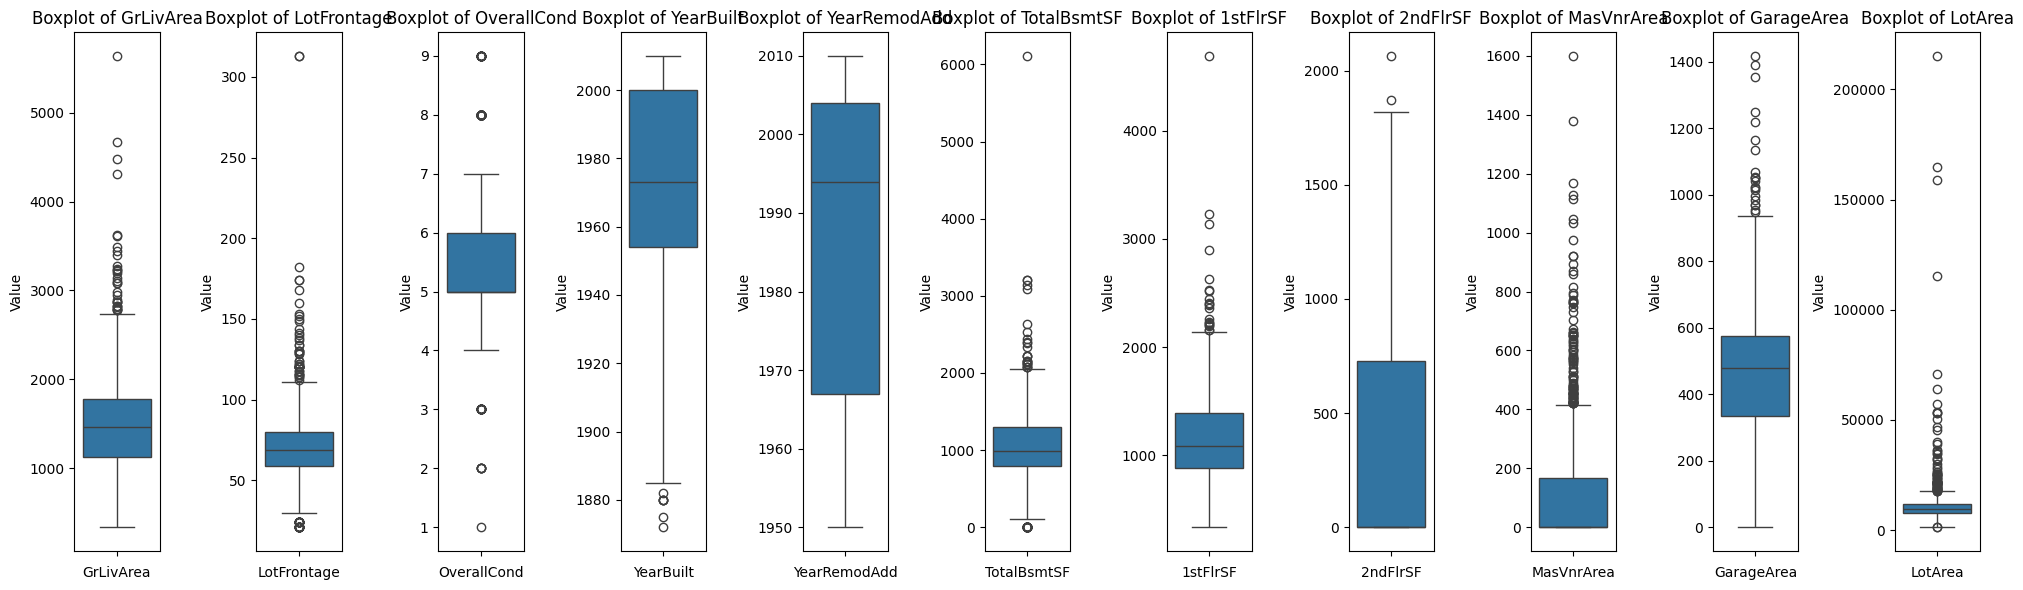

In [10]:
# Create subplots for boxplots
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(20, 6))

# Plot boxplots for each column
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [11]:
q1 = df[numeric_cols].quantile(0.25)
q3 = df[numeric_cols].quantile(0.75)
iqr = q3 - q1

#define outlier thresholds
lower_bound = q1 - 3 * iqr
upper_bound = q3 + 3 * iqr

#create a boolean mask for rows without outliers
mask = (df[numeric_cols] >= lower_bound) & (df[numeric_cols] <= upper_bound)

#keep only rows without outliers
df = df[mask.all(axis = 1)]

print(f"[!] Size of df without outliers: {len(df.axes[0])}")

[!] Size of df without outliers: 1145


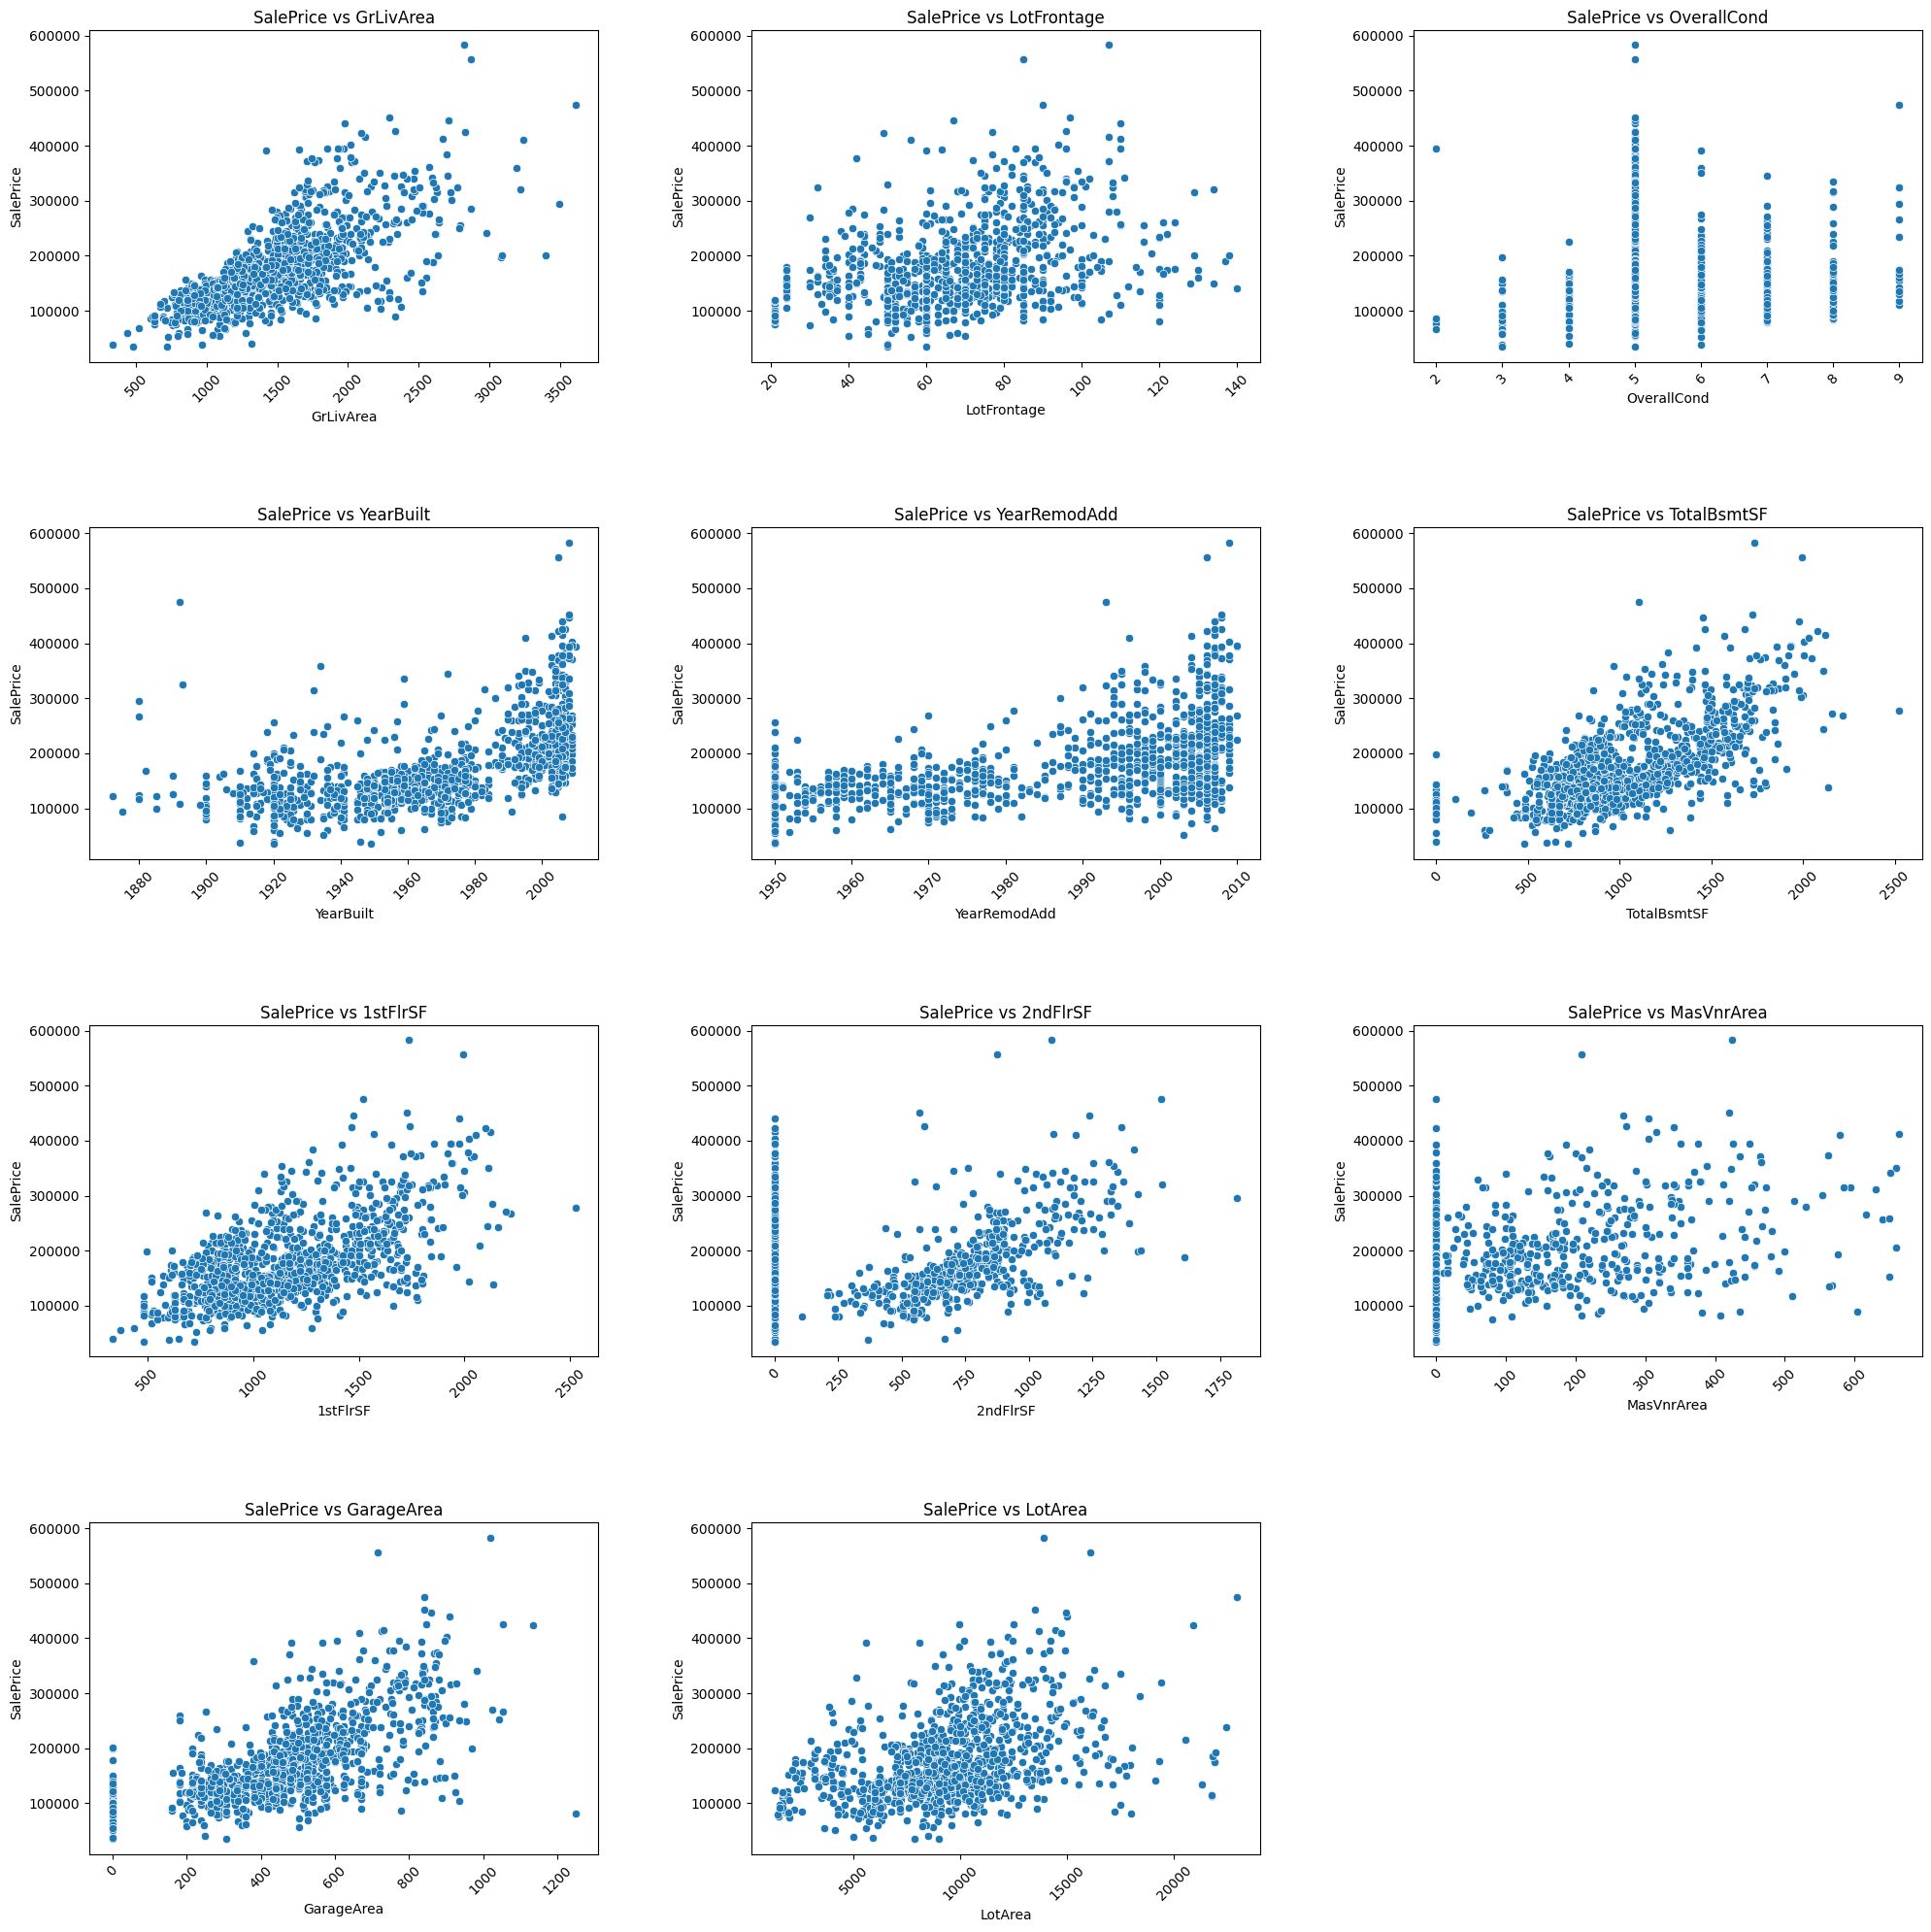

In [12]:
num_plots = len(numeric_cols)
cols = 3
rows = (num_plots // cols) + (num_plots % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))

axes = axes.flatten()

#plot scatterplots
for i, col in enumerate(numeric_cols):
    sns.scatterplot(x=df[col], y=df['SalePrice'], ax=axes[i])
    axes[i].set_title(f'SalePrice vs {col}', pad = 5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('SalePrice')
    axes[i].tick_params(axis = 'x', rotation = 45, labelsize = 10) #rotate x-axis labels and adjust size

# Remove empty subplots if any
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Increase horizontal and vertical space between plots

plt.show()

In [13]:
categoricals = ['LotConfig', 'PavedDrive', 'KitchenQual', 'BsmtQual', 'LandContour', 'BldgType', 'Neighborhood', 'GarageType', 'CentralAir', 'HeatingQC', 'Heating', 'GarageFinish', 'Exterior2nd', 'HouseStyle']

for category in categoricals:
    uniques = df[category].unique()
    mapping = {value: i for i, value in enumerate(uniques)}
    df[category] = df[category].map(mapping)

In [14]:
numeric_cols = numeric_cols + categoricals
print(numeric_cols)
print(df.head())


['GrLivArea', 'LotFrontage', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MasVnrArea', 'GarageArea', 'LotArea', 'LotConfig', 'PavedDrive', 'KitchenQual', 'BsmtQual', 'LandContour', 'BldgType', 'Neighborhood', 'GarageType', 'CentralAir', 'HeatingQC', 'Heating', 'GarageFinish', 'Exterior2nd', 'HouseStyle']
   Id  MSSubClass  LotFrontage  LotArea Street LotShape  LandContour  \
0   1          60         65.0     8450   Pave      Reg            0   
1   2          20         80.0     9600   Pave      Reg            0   
2   3          60         68.0    11250   Pave      IR1            0   
3   4          70         60.0     9550   Pave      IR1            0   
4   5          60         84.0    14260   Pave      IR1            0   

  Utilities  LotConfig LandSlope  ...  EnclosedPorch  3SsnPorch  ScreenPorch  \
0    AllPub          0       Gtl  ...              0          0            0   
1    AllPub          1       Gtl  ...              0          

In [17]:
#ANOVA
f_values, p_values = f_classif(x, y)

to_drop = []

for x in range(len(p_values)):
    print(f"[!] {categoricals[x]} Statistics")
    print(f'ANOVA F-values: {f_values[x]}')
    print(f'ANOVA p-values: {p_values[x]}')
    if p_values[x] > .05:
        print(f'[!] {categoricals[x]} is not significant!')
        to_drop.append(categoricals[x])

for drop in to_drop:
    numeric_cols.remove(drop)


numeric_cols.remove("MasVnrArea")

x_significant = df[numeric_cols]
print(numeric_cols)
y = df['SalePrice']

[!] LotConfig Statistics
ANOVA F-values: 1.0040246419076035
ANOVA p-values: 0.4806625211502735
[!] LotConfig is not significant!
[!] PavedDrive Statistics
ANOVA F-values: 0.9632073677335055
ANOVA p-values: 0.6727285443601725
[!] PavedDrive is not significant!
[!] KitchenQual Statistics
ANOVA F-values: 1.9182127390125583
ANOVA p-values: 5.269404268233378e-15
[!] BsmtQual Statistics
ANOVA F-values: 1.6471917246267263
ANOVA p-values: 1.399136001994359e-09
[!] LandContour Statistics
ANOVA F-values: 1.061828900988624
ANOVA p-values: 0.2365187772520163
[!] LandContour is not significant!
[!] BldgType Statistics
ANOVA F-values: 1.055665396183312
ANOVA p-values: 0.25850466247397713
[!] BldgType is not significant!
[!] Neighborhood Statistics
ANOVA F-values: 1.204925531301519
ANOVA p-values: 0.012940137176428824
[!] GarageType Statistics
ANOVA F-values: 1.2494485566655595
ANOVA p-values: 0.0038951036961069932
[!] CentralAir Statistics
ANOVA F-values: 1.318449373484998
ANOVA p-values: 0.00048018

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_significant, y, test_size = 0.2, random_state = 42)

In [19]:
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
# make predictions for test data
y_pred = model.predict(x_test)

In [21]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:
print("Mean Absolute Error: %.2f" % mae)
print("R-squared: %.2f" % r2)

Mean Absolute Error: 18724.51
R-squared: 0.83
